<a href="https://colab.research.google.com/github/sifta/DemoNotebooks/blob/master/ChaosSim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define the logistic map as follows:

$$ x_{n+1} = \alpha (x_{n})(1-x_{n}) $$


In [0]:
# define logistic map and alternate map
class GenericMap:
  alpha_start = 0
  alpha_stop = 4
  step = 0.005
  ymin = 0
  ymax = 1

  def map(self, x, alpha):
    return np.nan

class Logit(GenericMap):
  def __init__(self):
    self.alpha_start = 2.5
    self.reference_alpha = [3.743]
  def map(self, x, alpha):
    return alpha * x * (1-x)

class Alternate(GenericMap):
  def __init__(self):
    self.alpha_start = 0
    self.alpha_stop = 2.75
    self.reference_alpha = [0.8]
    self.ymin = -np.pi
    self.ymax = np.pi
  def map(self, x, alpha):
    return alpha*np.sin(x*np.pi)


In [0]:
funct = Logit()
funct.step = 0.005
df_log = pd.DataFrame()
case_summary = []
param_sweep = np.arange(funct.alpha_start, funct.alpha_stop, funct.step)

In [0]:
for p in param_sweep:
    state = np.array([0.5])
    for i in range(5000):
        new_state=funct.map(state[-1], alpha = p)
        state = np.append(state, new_state)
    df_case = pd.DataFrame.from_dict({'state_hist': state})
    df_case['alpha'] = p
    df_log = pd.concat([df_log, df_case], sort=False)
    case_summary.append((p, np.unique(state[150:])))
    
df_summary = pd.DataFrame(case_summary, columns=['lambda', 'orbit points'])
params = pd.unique(df_summary['lambda'])

In [0]:
def plot_trace(logdat, f, alpha_list, target_alpha, iter_start=50, iter_stop=250, iter_end=500):
  iterations = np.arange(0, iter_end)
  index = np.argmin(np.abs(params-target_alpha))
  print("Alpha = {}".format(params[index]))
  plt.figure(figsize=(8,6))
  plt.plot(iterations[iter_start:iter_stop], logdat.loc[logdat['alpha'] == alpha_list[index]].state_hist[iter_start:iter_stop], '-o')
  plt.ylim([funct.ymin, funct.ymax])
  plt.show()


Alpha = 3.7449999999999735


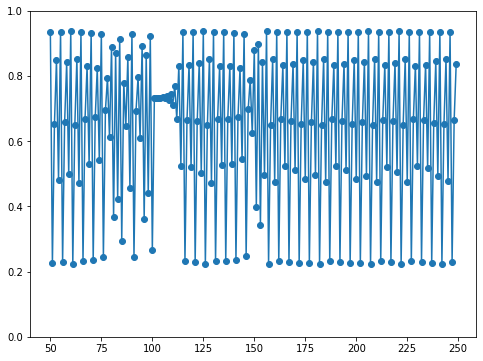

In [103]:
#@title Trace at a specific reference alpha
target = funct.reference_alpha[0]
plot_trace(df_log, funct, params, target)

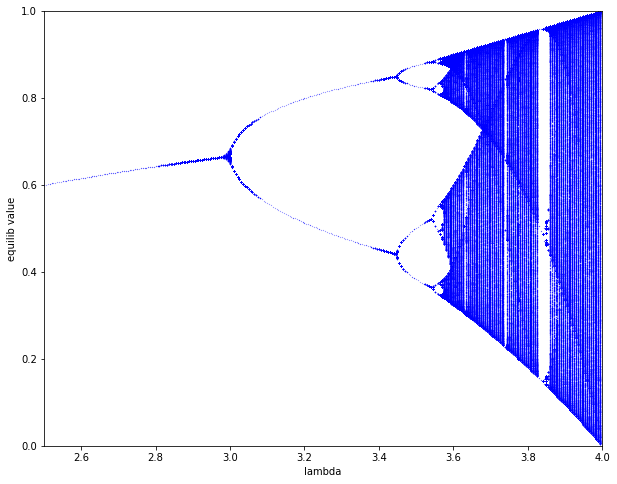

In [104]:
plt.figure(figsize=(10,8))
for s in case_summary:
    plt.plot(s[0]*np.ones(len(s[1])), s[1], 'b.', markersize=0.3)
plt.ylim([funct.ymin,funct.ymax])
plt.xlim([funct.alpha_start, funct.alpha_stop])
# comment this and adjust to zoom in
# plt.xlim([2.5, 4])
plt.xlabel('lambda')
plt.ylabel('equilib value')
plt.show()